In [17]:
import geopandas as gpd

districts = gpd.read_file('https://geoportal.madrid.es/fsdescargas/IDEAM_WBGEOPORTAL/LIMITES_ADMINISTRATIVOS/Distritos/Distritos.zip')

districts = districts.to_crs(epsg=4326)

districts['COD_DIS'] = districts['COD_DIS'].astype(int)
districts['COD_DIS_TX'] = districts['COD_DIS_TX'].astype(int)

districts_poly = {row['COD_DIS']: [(i[1],i[0]) for i in list(row['geometry'].exterior.coords)] for _, row in districts.iterrows()}

districts_names = {row['COD_DIS']: row['NOMBRE'] for _, row in districts.iterrows()}

districts

,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,Area_m2,geometry
0,1,1,Centro,CENTRO,CENTRO,5.228247e+06,"POLYGON ((-3.69316 40.40735, -3.69320 40.40720..."
1,10,10,Latina,LATINA,LATINA,2.542720e+07,"POLYGON ((-3.72261 40.41138, -3.72182 40.40851..."
2,11,11,Carabanchel,CARABANCHEL,CARABANCHEL,1.404832e+07,"POLYGON ((-3.71932 40.39984, -3.71901 40.39983..."
3,12,12,Usera,USERA,USERA,7.777717e+06,"POLYGON ((-3.68315 40.36474, -3.68314 40.36449..."
4,13,13,Puente de Vallecas,PUENTE DE VALLECAS,PUENTE DE VALLECAS,1.496861e+07,"POLYGON ((-3.67807 40.36069, -3.67875 40.36068..."
5,14,14,Moratalaz,MORATALAZ,MORATALAZ,6.103168e+06,"POLYGON ((-3.64289 40.41451, -3.64095 40.41442..."
6,15,15,Ciudad Lineal,CIUDAD LINEAL,CIUDAD LINEAL,1.142568e+07,"POLYGON ((-3.62189 40.41553, -3.62162 40.41516..."
7,16,16,Hortaleza,HORTALEZA,HORTALEZA,2.762610e+07,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112..."
8,17,17,Villaverde,VILLAVERDE,VILLAVERDE,2.018759e+07,"POLYGON ((-3.70366 40.36356, -3.70324 40.36356..."
9,18,18,Villa de Vallecas,VILLA DE VALLECAS,VILLA DE VALLECAS,5.146724e+07,"POLYGON ((-3.60705 40.38666, -3.60648 40.38625..."


Number of labels: 21


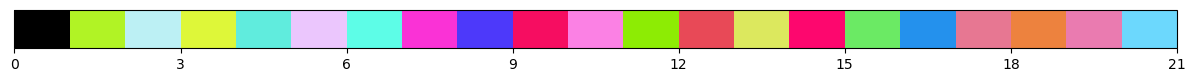

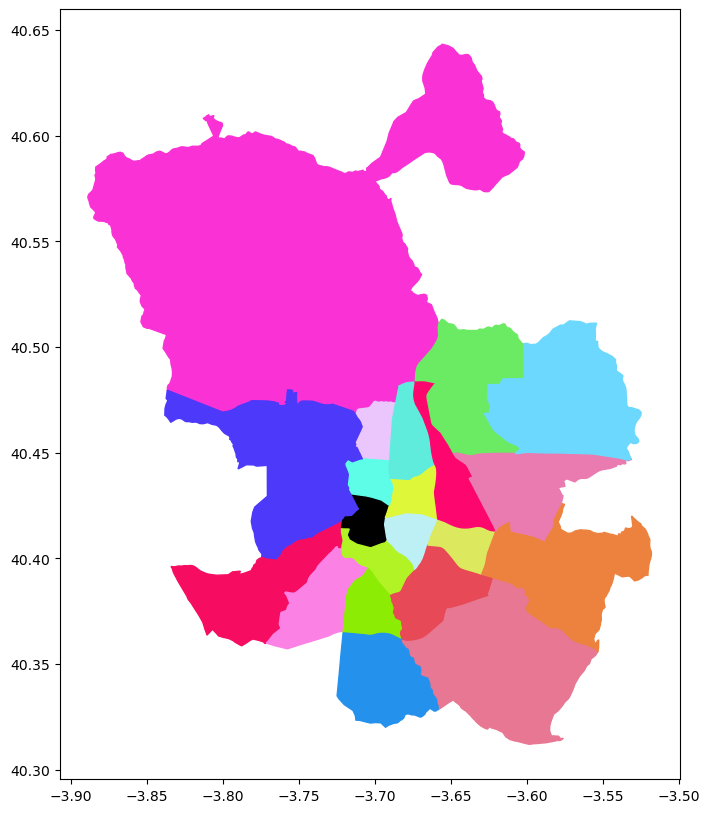

In [18]:
import matplotlib.pyplot as plt
import lib.visualization as viz

new_cmap = viz.rand_cmap(districts.shape[0], type='bright', first_color_black=True, last_color_black=False, verbose=True)

plt.figure(figsize=(8,10))
for distr in range(districts.shape[0]):

    a, b = zip(*list(districts_poly[distr+1]))

    plt.fill(b, a, c=new_cmap(distr))

plt.show()

In [19]:
from lib.data.raw import load_dataset
from lib.data import constants

traffic_stations = next(load_dataset(constants.MEASURING_STATIONS_DATA_NAMES[0], 'csv', constants.START_YEAR, verbose=True))

traffic_stations = traffic_stations[~traffic_stations['distrito'].isna()]

traffic_stations = traffic_stations[['id', 'tipo_elem', 'distrito', 'longitud', 'latitud']]

traffic_stations['distrito'] = traffic_stations['distrito'].astype(int)

traffic_stations

  Found 48 files
    Dataframe size: (4663, 9)


,id,tipo_elem,distrito,longitud,latitud
0,3840,URB,4,-3.688323,40.430502
1,3841,URB,4,-3.687256,40.430524
2,3842,URB,1,-3.691727,40.422132
3,3843,URB,4,-3.691929,40.421433
4,3844,URB,4,-3.688470,40.433782
...,...,...,...,...,...
4658,6809,M30,16,-3.659954,40.483080
4659,6810,M30,16,-3.659926,40.483158
4660,6933,M30,16,-3.672497,40.484118
4661,7129,M30,16,-3.672500,40.484181


In [24]:
traffic_stations = traffic_stations.merge(districts, left_on='distrito', right_on='COD_DIS', how='left')

traffic_stations

,id,tipo_elem,distrito,longitud,latitud,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,Area_m2,geometry
0,3840,URB,4,-3.688323,40.430502,4,4,Salamanca,SALAMANCA,SALAMANCA,5.392403e+06,"POLYGON ((-3.65940 40.43827, -3.65959 40.43698..."
1,3841,URB,4,-3.687256,40.430524,4,4,Salamanca,SALAMANCA,SALAMANCA,5.392403e+06,"POLYGON ((-3.65940 40.43827, -3.65959 40.43698..."
2,3842,URB,1,-3.691727,40.422132,1,1,Centro,CENTRO,CENTRO,5.228247e+06,"POLYGON ((-3.69316 40.40735, -3.69320 40.40720..."
3,3843,URB,4,-3.691929,40.421433,4,4,Salamanca,SALAMANCA,SALAMANCA,5.392403e+06,"POLYGON ((-3.65940 40.43827, -3.65959 40.43698..."
4,3844,URB,4,-3.688470,40.433782,4,4,Salamanca,SALAMANCA,SALAMANCA,5.392403e+06,"POLYGON ((-3.65940 40.43827, -3.65959 40.43698..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4653,6809,M30,16,-3.659954,40.483080,16,16,Hortaleza,HORTALEZA,HORTALEZA,2.762610e+07,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112..."
4654,6810,M30,16,-3.659926,40.483158,16,16,Hortaleza,HORTALEZA,HORTALEZA,2.762610e+07,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112..."
4655,6933,M30,16,-3.672497,40.484118,16,16,Hortaleza,HORTALEZA,HORTALEZA,2.762610e+07,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112..."
4656,7129,M30,16,-3.672500,40.484181,16,16,Hortaleza,HORTALEZA,HORTALEZA,2.762610e+07,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112..."


In [29]:
# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import numpy as np

is_inside = lambda d, lon, lat: d.contains(Point(lon, lat))

traffic_stations['is_inside'] = np.vectorize(is_inside)(traffic_stations['geometry'], traffic_stations['longitud'], traffic_stations['latitud'])

traffic_stations[traffic_stations['distrito'] == 9]['is_inside'].all()

True

In [39]:
import folium

# https://python-visualization.github.io/folium/quickstart.html
# para si eso colorear por degradados
# o también la opción de heatmaps

# https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
# https://stackoverflow.com/questions/64792041/white-gap-between-python-folium-map-and-jupyter-notebook-cell 

from branca.element import Figure
fig = Figure(width=600, height=700)
m = folium.Map(location=[40.47, -3.70], zoom_start=11, max_zoom=13, min_zoom=11, tiles='CartoDB positron')
fig.add_child(m)

In [40]:
colores = {d: viz.cmapcolor_to_hexcolor(new_cmap(i)) for i, d in enumerate(districts_poly)}

alpha = 1

alpha = str(hex(round(alpha*255)))[2:].upper()
alpha = alpha if len(alpha) == 2 else '0'+alpha

import json

for _, r in districts.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed

    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)

    geo_j = sim_geo.to_json()

    geo_jj = json.loads(geo_j)
    geo_jj['features'][0]['properties']['color'] = colores[r['COD_DIS']]
    geo_j = json.dumps(geo_jj)

    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': x['properties']['color']})

    folium.Popup(r['NOMBRE']).add_to(geo_j)
    geo_j.add_to(m)

In [41]:
m

In [42]:
m = viz.add_categorical_legend(m, 'Distritos', colors=list(colores.values()), labels=list(districts_names.values()))
m

In [43]:
m.save("map_example.html")